# Customer Segmentation (Clustering)

```Julio Muhammad Rizki```

## Objectives

Notebook ini dibuat dalam rangka memenuhi technical test oleh Upscale. Penulis ditugaskan untuk membuat Model Segmentasi Pelanggan menggunakan Clustering dan pada case ini, penulis akan menggunakan K-Means.

Data diambil dari Kaggle dengan link : https://www.kaggle.com/datasets/mashlyn/online-retail-ii-uci

Data memiliki tabel yang berisi beberapa atribut sebagai berikut:

1. Invoice: Nomor faktur atau kode transaksi untuk setiap pembelian yang dilakukan oleh pelanggan. Setiap faktur memiliki nomor unik yang membedakan satu transaksi dengan transaksi lainnya.

2. StockCode: Kode unik untuk setiap produk atau barang yang terjual. Kode ini digunakan untuk mengidentifikasi barang dengan jelas dan membedakan satu barang dengan barang lainnya dalam daftar penjualan.

3. Description: Deskripsi singkat dari produk atau barang yang terjual. Deskripsi ini memberikan informasi tentang atribut atau karakteristik barang tersebut.

4. Quantity: Jumlah unit produk atau barang yang dibeli oleh pelanggan dalam satu transaksi. Angka ini menunjukkan berapa banyak unit barang yang dibeli oleh pelanggan dalam satu pembelian.

5. InvoiceDate: Tanggal dan waktu ketika transaksi pembelian terjadi. Informasi ini mencatat waktu spesifik kapan pelanggan melakukan pembelian.

6. Price: Harga unit untuk setiap produk atau barang yang terjual. Harga ini menunjukkan harga satuan dari barang yang dibeli oleh pelanggan.

7. Customer ID: Nomor identifikasi unik untuk setiap pelanggan. Nomor ini digunakan untuk mengidentifikasi pelanggan secara individu dan membedakan satu pelanggan dengan pelanggan lainnya.

8. Country: Negara tempat transaksi pembelian dilakukan. Informasi ini mencatat negara tempat pelanggan melakukan pembelian produk atau barang.

# Library Import

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples, pairwise_distances
from sklearn.neighbors import LocalOutlierFactor
from sklearn.utils import resample

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset
data = pd.read_csv('online_retail_II.csv', encoding='unicode_escape')

# Exploratory Data Analysis

Berikut adalah beberapa Eksplorasi Data untuk melihat gambaran Data. Dari Data yang digunakan, terdapat lebih dari 1 juta entry data.

In [3]:
# Check the shape of the dataset
print("Dataset shape:", data.shape)

Dataset shape: (1067371, 8)


Berikut adalah contoh data dalam berbentuk tabel diambil dari 5 entry data paling atas dan paling bawah.

In [4]:
data.head().append(data.tail())

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France
1067370,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680.0,France


Berdasarkan Description, berikut adalah 5 Description Product dengan quantity terbanyak.

In [5]:
data.groupby("Description").agg({"Quantity":"sum"}).sort_values("Quantity", ascending = False).head()

,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,108545
WHITE HANGING HEART T-LIGHT HOLDER,93050
ASSORTED COLOUR BIRD ORNAMENT,81306
JUMBO BAG RED RETROSPOT,78090
BROCADE RING PURSE,70700


Dari Entry Data tersebut terdapat 53.628 jumlah invoice.

In [6]:
data["Invoice"].nunique()

53628

Berikut adalah beberapa entry data dengan Price tertinggi.

In [7]:
data.sort_values("Price", ascending = False).head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
748142,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.00,15098.0,United Kingdom
241827,512771,M,Manual,1,2010-06-17 16:53:00,25111.09,NaN,United Kingdom
241824,C512770,M,Manual,-1,2010-06-17 16:52:00,25111.09,17399.0,United Kingdom
320581,C520667,BANK CHARGES,Bank Charges,-1,2010-08-27 13:42:00,18910.69,NaN,United Kingdom
1050063,C580605,AMAZONFEE,AMAZON FEE,-1,2011-12-05 11:36:00,17836.46,NaN,United Kingdom


United Kingdom memiliki entry data terbanyak dengan jumlah 981 ribu, disusul oleh EIRE dan Germany pada 17 ribu jumlah entry data.

In [8]:
data["Country"].value_counts().head()

United Kingdom    981330
EIRE               17866
Germany            17624
France             14330
Netherlands         5140
Name: Country, dtype: int64

In [9]:
# View the column names and data types
print("\nColumn names and data types:\n", data.dtypes)


Column names and data types:
 Invoice         object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
Price          float64
Customer ID    float64
Country         object
dtype: object


In [10]:
# Display the first few rows of the dataset
print("\nFirst few rows of the dataset:\n", data.head())


First few rows of the dataset:
   Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

           InvoiceDate  Price  Customer ID         Country  
0  2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1  2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2  2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3  2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4  2009-12-01 07:45:00   1.25      13085.0  United Kingdom  


In [11]:
# Create a new column for total revenue
data['Revenue'] = data['Quantity'] * data['Price']

data.groupby("Country").agg({"Revenue":"sum"}).sort_values("Revenue", ascending = False).head()

,Revenue
Country,
United Kingdom,1.638258e+07
EIRE,6.155196e+05
Netherlands,5.485249e+05
Germany,4.179886e+05
France,3.281918e+05


Berikut adalah beberapa visualisasi data untuk mengenal lebih baik tentang Distribusi Data yang ada.

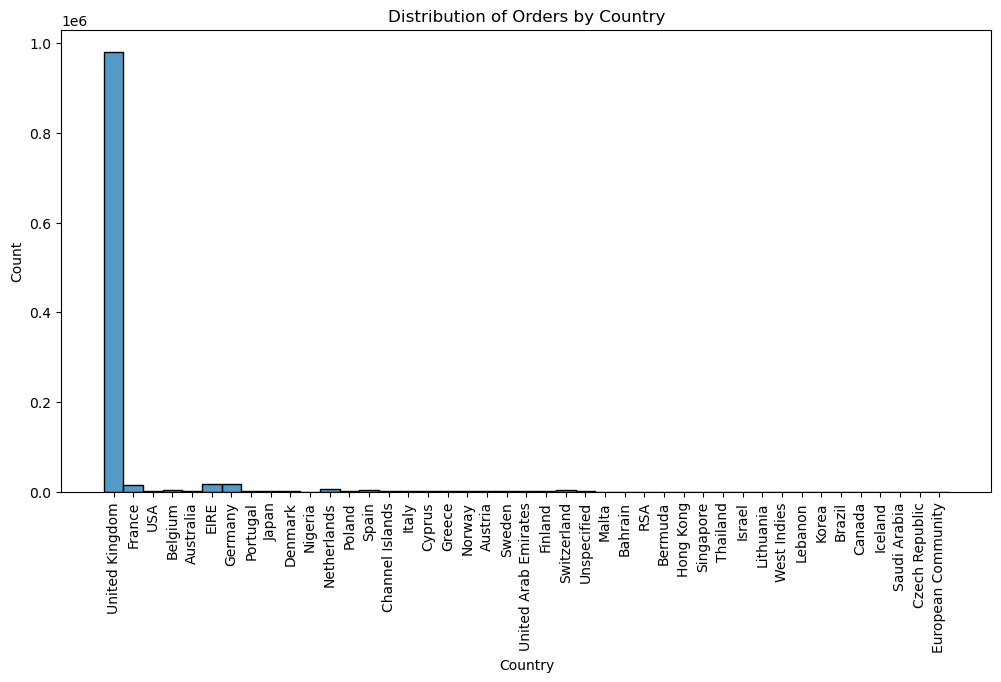

In [12]:
# Data by Country (in million)
plt.figure(figsize=(12, 6))
sns.histplot(data['Country'])
plt.title('Distribution of Orders by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

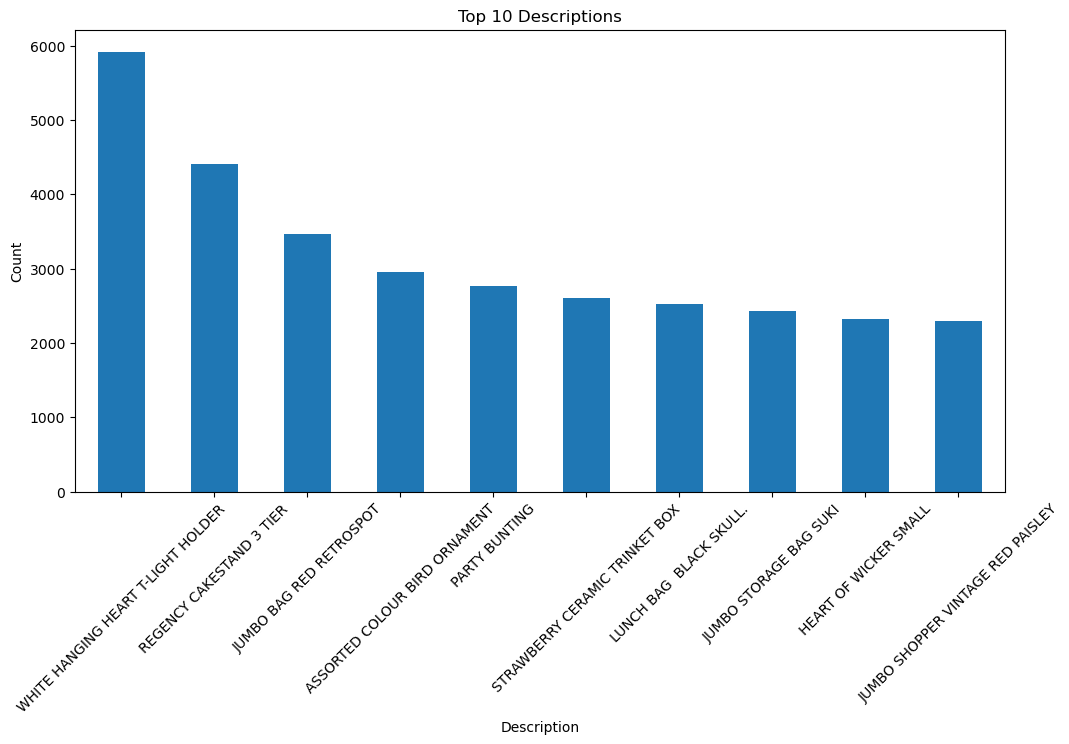

In [13]:
plt.figure(figsize=(12, 6))
data['Description'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 Descriptions')
plt.xlabel('Description')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


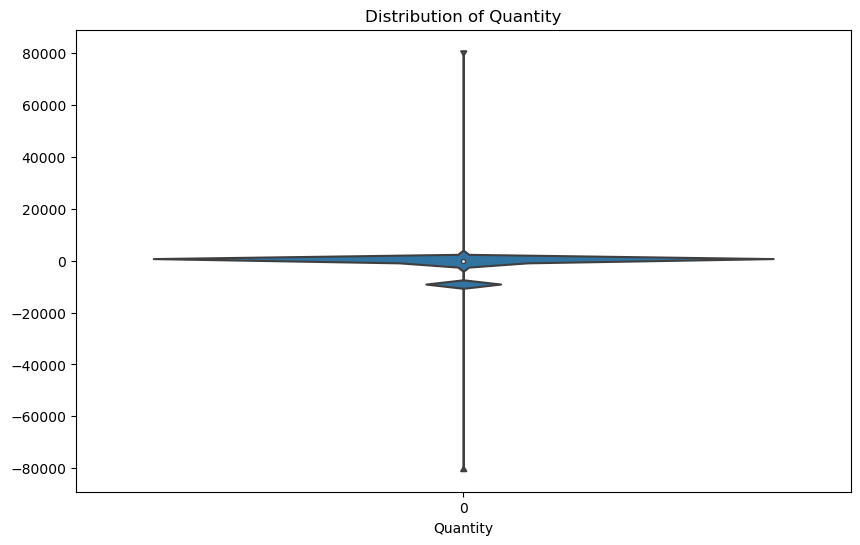

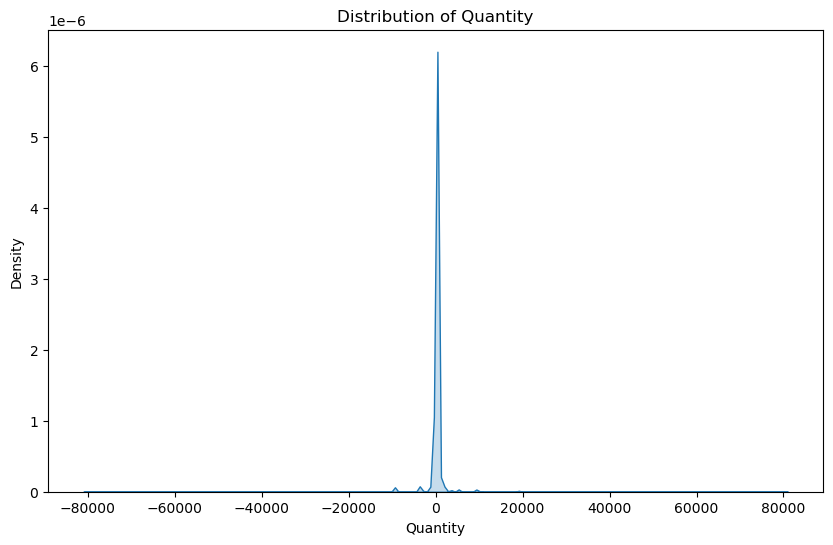

In [14]:
# Distribution of Quantity
plt.figure(figsize=(10, 6))
sns.violinplot(data['Quantity'])
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.show()

plt.figure(figsize=(10, 6))
sns.kdeplot(data['Quantity'], shade=True)
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Density')
plt.show()

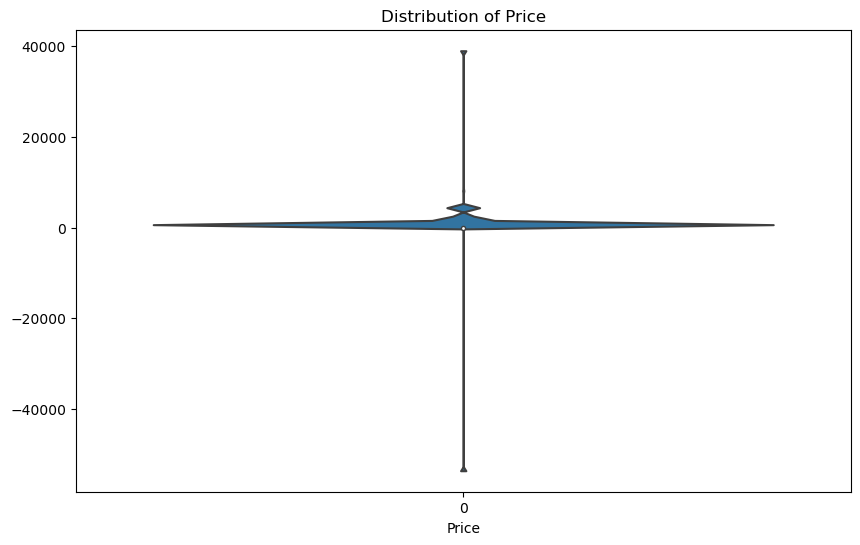

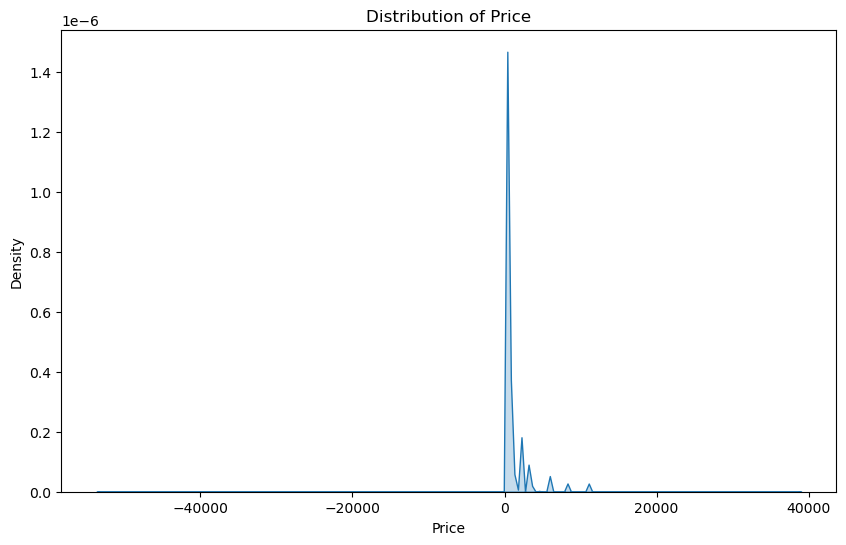

In [15]:
# Distribution of Price
plt.figure(figsize=(10, 6))
sns.violinplot(data['Price'])
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.show()

plt.figure(figsize=(10, 6))
sns.kdeplot(data['Price'], shade=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

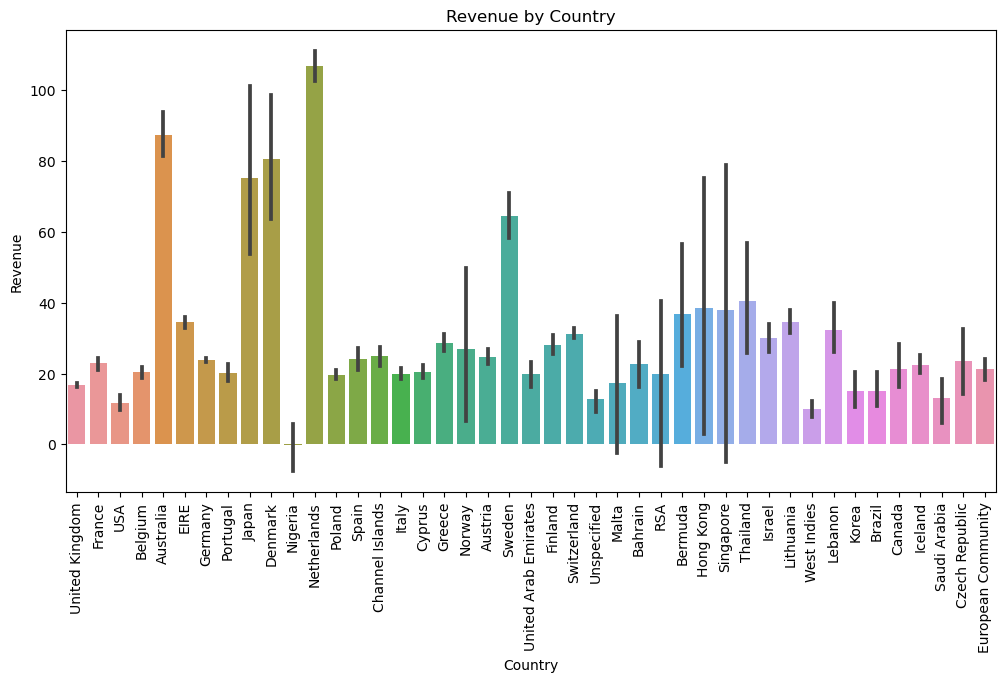

In [16]:
# Revenue by Country
plt.figure(figsize=(12, 6))
sns.barplot(x=data['Country'], y=data['Revenue'])
plt.title('Revenue by Country')
plt.xlabel('Country')
plt.ylabel('Revenue')
plt.xticks(rotation=90)
plt.show()

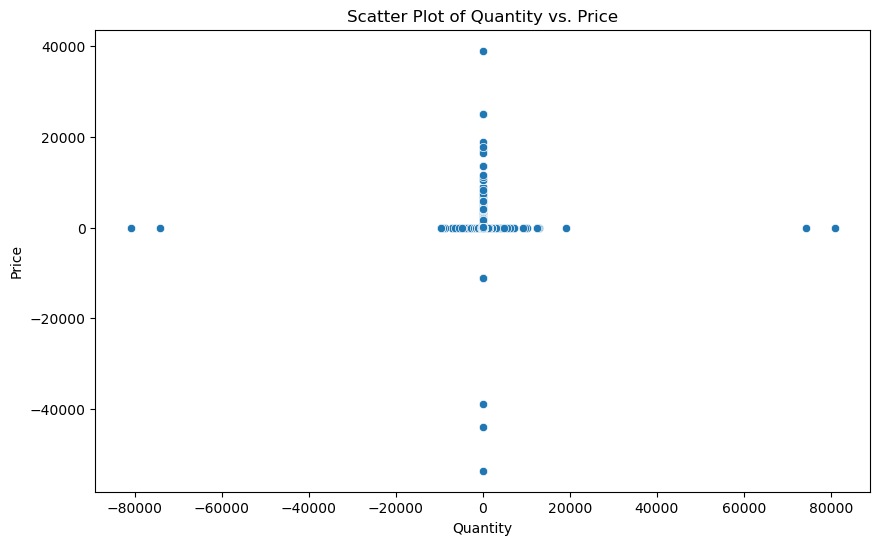

In [17]:
# Scatter Plot of Quantity and Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity', y='Price', data=data)
plt.title('Scatter Plot of Quantity vs. Price')
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.show()

## Data Cleaning

Untuk melanjutkan pengerjaan notebook, missing value akan di drop demi memudahkan proses pembelajaran pada Machine Learning.

In [18]:
# Handle missing values
data.dropna(inplace=True)

In [19]:
# Convert the necessary columns to appropriate data types
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [20]:
# Remove duplicates
data.drop_duplicates(inplace=True)

In [21]:
# Check for any remaining missing values
print("Missing values:\n", data.isnull().sum())

Missing values:
 Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
Revenue        0
dtype: int64


# Feature Engineering

Selanjutnya, Outlier pada data akan dibuang menggunakan LOF (Local Outlier Factor) dan akan dilakukan preprocessing dan PCA sebelum memasuki Model Training.

In [22]:
# Handle outliers using Local Outlier Factor (LOF)
outlier_detector = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
outlier_scores = outlier_detector.fit_predict(data[['Quantity', 'Price', 'Revenue']])
data['Outlier'] = outlier_scores
data = data[data['Outlier'] != -1]  # Remove outliers

In [23]:
# Select relevant features for clustering
features = ['Customer ID', 'Quantity', 'Price', 'Revenue']

In [24]:
# Subset the data with selected features
X = data[features]

In [25]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [26]:
# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

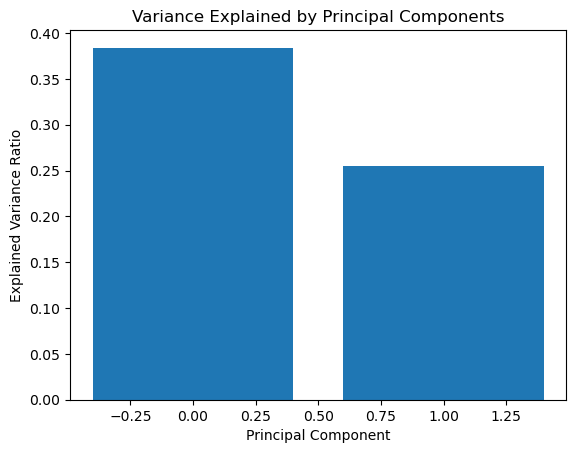

In [27]:
# Plot the variance explained by each principal component
explained_variance_ratio = pca.explained_variance_ratio_
plt.bar(range(len(explained_variance_ratio)), explained_variance_ratio)
plt.title('Variance Explained by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

# Clustering with K-Means

Clustering yang digunakan pada Notebook ini adalah menggunakan metode K-Means.

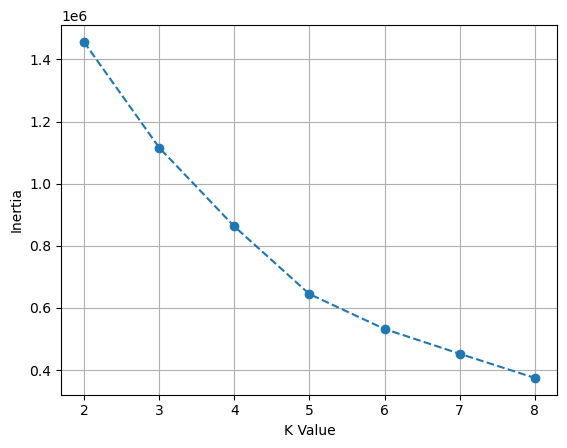

In [28]:
# Determine the optimal number of clusters using inertia
K = [2, 3, 4, 5, 6, 7, 8]
inertia = [KMeans(n_clusters=i).fit(X_pca).inertia_ for i in K]
plt.plot(K, inertia, 'o--')
plt.xlabel('K Value')
plt.ylabel('Inertia')
plt.grid()
plt.show()

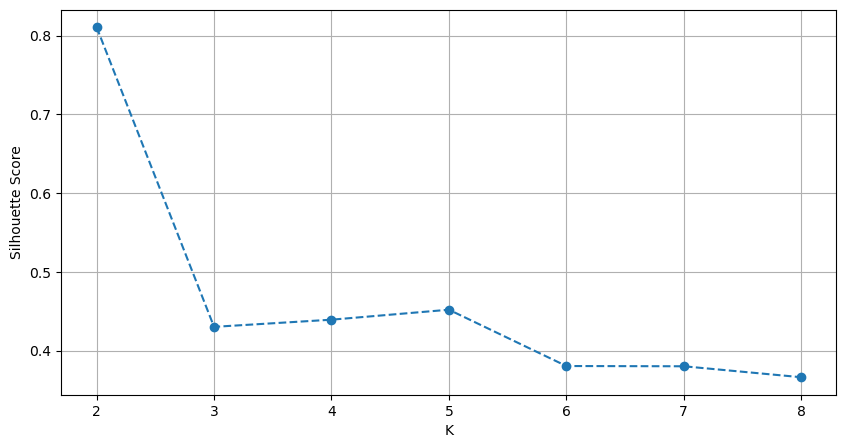

In [29]:
# Set the maximum number of samples for silhouette score calculation
max_samples = 5000

# Calculate silhouette scores for different number of clusters
s_score_slc = []
for k in K:
    # Randomly sample a subset of the data
    X_sampled = resample(X_pca, n_samples=max_samples, random_state=42)
    labels = KMeans(n_clusters=k, random_state=42).fit_predict(X_sampled)
    s_score = silhouette_score(X_sampled, labels)
    s_score_slc.append(s_score)

# Plot silhouette scores for different number of clusters
plt.figure(figsize=(10, 5))
plt.plot(K, s_score_slc, 'o--')
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()

Berdasarkan pencarian menggunakan inertia dan silhouette score diatas, ditemukan bahwa pada silhouette score terdapat knee point pada jumlah cluster nomor 3 sehingga n_cluster yang akan digunakan selanjutnya adalah 3 cluster. Selanjutnya Model akan di fit terhadap data dengan jumlah cluster = 3.

In [30]:
# Perform clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_pca)

KMeans(n_clusters=3, random_state=42)

In [31]:
# Add cluster labels to the original dataset
data['Cluster'] = kmeans.labels_

# Model Evaluation

Berikut adalah gambaran dari cluster yang telah terbentuk. Kesimpulan akan diberikan di bagian paling bawah secara bersamaan untuk menjelaskan tentang cluster / segmen pelanggan yang telah dibentuk.

In [32]:
# Calculate the mean values for each cluster
cluster_means = data.groupby('Cluster').mean()

In [33]:
# Add cluster labels to the original dataset
data['Cluster'] = kmeans.labels_

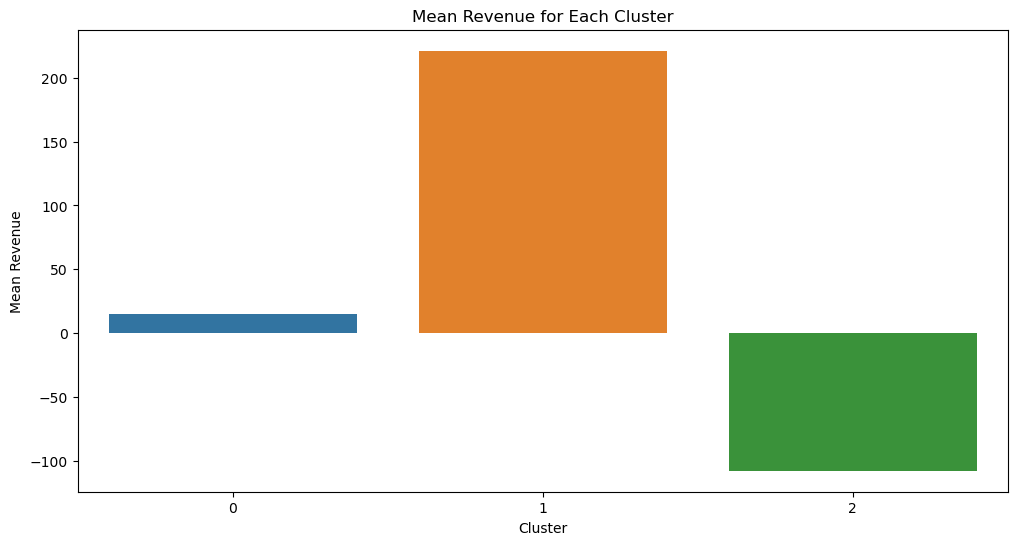

In [34]:
# Plot the mean values for each cluster
plt.figure(figsize=(12, 6))
sns.barplot(x=cluster_means.index, y=cluster_means['Revenue'])
plt.title('Mean Revenue for Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Mean Revenue')
plt.show()

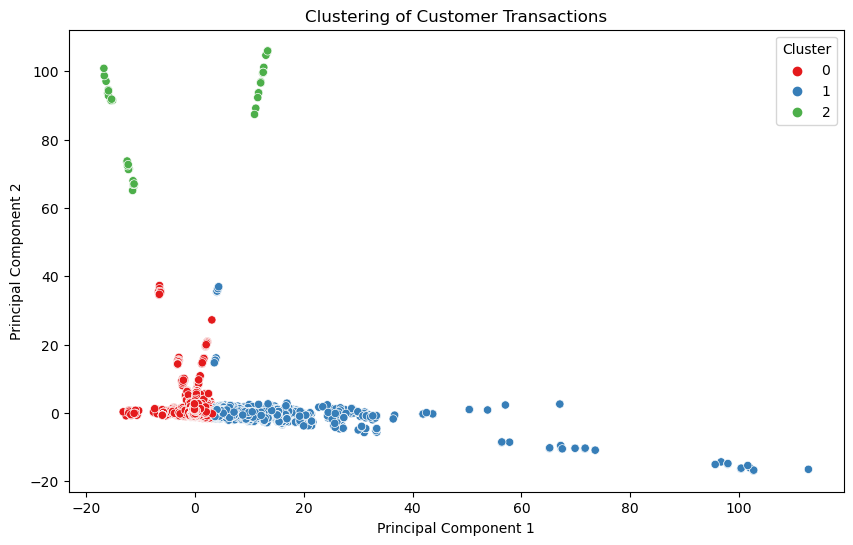

In [35]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=data['Cluster'], palette='Set1')
plt.title('Clustering of Customer Transactions')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [36]:
# Analyze the clusters
cluster_means = data.groupby('Cluster').mean()
cluster_counts = data['Cluster'].value_counts()

In [37]:
# Print the cluster statistics
print("Cluster Statistics:")
print(cluster_means)
print("\nCluster Counts:")
print(cluster_counts)

Cluster Statistics:
           Quantity       Price   Customer ID     Revenue  Outlier
Cluster                                                           
0          8.603778    2.997723  15318.344848   15.045767      1.0
1        156.132136    3.307426  15016.803608  221.040985      1.0
2         -0.227273  717.586364  14367.000000 -107.569091      1.0

Cluster Counts:
0    769260
1     12139
2        44
Name: Cluster, dtype: int64


## Analysis

Dari data tersebut, terdapat 3 klaster (cluster) yang dihasilkan dari proses clustering. Berikut adalah kesimpulan dari masing-masing klaster:

Klaster 0:
- Jumlah barang yang dibeli (Quantity) rata-rata: 8.603778
- Harga barang (Price) rata-rata: 2.997723
- ID pelanggan (Customer ID) rata-rata: 15318.344848
- Pendapatan dari transaksi (Revenue) rata-rata: 15.045767
- Jumlah outlier dalam klaster: 1
- Jumlah transaksi dalam klaster: 769,260

Klaster 1:
- Jumlah barang yang dibeli (Quantity) rata-rata: 156.132136
- Harga barang (Price) rata-rata: 3.307426
- ID pelanggan (Customer ID) rata-rata: 15016.803608
- Pendapatan dari transaksi (Revenue) rata-rata: 221.040985
- Jumlah outlier dalam klaster: 1
- Jumlah transaksi dalam klaster: 12,139

Klaster 2:
- Jumlah barang yang dibeli (Quantity) rata-rata: -0.227273
- Harga barang (Price) rata-rata: 717.586364
- ID pelanggan (Customer ID) rata-rata: 14367.000000
- Pendapatan dari transaksi (Revenue) rata-rata: -107.569091
- Jumlah outlier dalam klaster: 1
- Jumlah transaksi dalam klaster: 44

Kesimpulan:
- Klaster 0 memiliki jumlah transaksi terbanyak (769,260) dengan jumlah barang yang dibeli dan pendapatan yang rendah.
- Klaster 1 memiliki jumlah transaksi sedang (12,139) dengan jumlah barang yang dibeli dan pendapatan yang lebih tinggi dibandingkan klaster lainnya.
- Klaster 2 memiliki jumlah transaksi yang sangat sedikit (44) dengan harga barang yang tinggi dan pendapatan yang negatif.

==============================================================================================================================================================

Berdasarkan statistik kluster diatas, berikut adalah beberapa rekomendasi untuk toko retail agar dapat menggunakan segmen ini dalam strategi pemasaran dan penjualan mereka:

1. Kluster 0: Pelanggan dengan jumlah barang yang relatif kecil, harga yang rendah, dan pendapatan yang rendah. Rekomendasi:

   - Penawaran harga terjangkau: Fokus pada produk dengan harga yang lebih terjangkau dan tawarkan diskon atau penawaran khusus yang dapat menarik perhatian pelanggan dalam segmen ini.
   - Program loyalitas: Buat program loyalitas yang memberikan insentif bagi pelanggan untuk kembali berbelanja, seperti poin reward atau diskon tambahan.

2. Kluster 1: Pelanggan dengan jumlah barang yang relatif besar, harga yang sedang, dan pendapatan yang menengah. Rekomendasi:

   - Penawaran bundling: Tawarkan paket produk atau penawaran bundling yang menarik bagi pelanggan dalam segmen ini untuk meningkatkan nilai transaksi.
   - Komunikasi personal: Gunakan pendekatan yang lebih personal dan berikan rekomendasi produk yang sesuai dengan preferensi dan pembelian sebelumnya.

3. Kluster 2: Pelanggan dengan jumlah barang negatif, harga tinggi, dan pendapatan yang rendah. Rekomendasi:

   - Analisis keuangan: Pelajari lebih lanjut mengenai pelanggan dalam segmen ini untuk memahami mengapa mereka memiliki jumlah barang negatif dan bagaimana cara mengubahnya.
   - Penawaran eksklusif: Berikan penawaran eksklusif pada produk-produk dengan harga tinggi yang mungkin menarik minat pelanggan dalam segmen ini.

Selain itu, rekomendasi umum yang dapat diterapkan untuk semua segmen adalah:

- Peningkatan pengalaman pelanggan: Fokus pada pelayanan pelanggan yang unggul dan pengalaman yang memikat untuk meningkatkan loyalitas pelanggan di semua segmen.
- Pemasaran digital: Manfaatkan media sosial, email marketing, dan strategi pemasaran digital lainnya untuk berkomunikasi dengan pelanggan dalam segmen yang berbeda dan mempromosikan produk secara efektif.
- Segmentasi lanjutan: Selain segmen yang telah diidentifikasi, lakukan analisis lanjutan untuk mengidentifikasi segmen tambahan yang mungkin ada dan mengembangkan strategi yang disesuaikan untuk masing-masing segmen tersebut.

Penerapan strategi ini akan membantu toko retail dalam memperluas pangsa pasar, meningkatkan kepuasan pelanggan, dan mengoptimalkan hasil penjualan mereka. Pastikan untuk memantau dan mengevaluasi kinerja strategi ini secara berkala untuk melakukan penyesuaian yang diperlukan dan memastikan kesuksesan jangka panjang.